#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


In [ ]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import datetime

# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar datos
data = pd.read_csv('/content/drive/MyDrive/rrhh.csv', encoding='UTF-8-SIG')

In [ ]:
data.shape

(1000, 6)

In [ ]:
data = pd.get_dummies(data=data, columns=['Posicion','Educacion'])# generando dummies de variables categoricas

In [ ]:
print('\n'.join(data.columns))

Experiencia
Hijos
Casado
Salario
Posicion_Analista
Posicion_Coordinador
Posicion_Gerente
Educacion_Bachillerato
Educacion_Licenciatura
Educacion_Posgrado


In [ ]:
y = np.array(data['Salario'])

In [ ]:
X = data.loc[:,['Experiencia','Hijos','Casado','Posicion_Analista','Posicion_Coordinador','Posicion_Gerente','Educacion_Bachillerato','Educacion_Licenciatura','Educacion_Posgrado']]

In [ ]:
y.shape

(1000,)

In [ ]:
X.shape

(1000, 9)

In [ ]:
#estandarizando X
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_pred = modelo_LinReg.predict(X_test)

In [ ]:
media = scaler.mean_
dev_estandar = scaler.scale_
respuesta_estimada = y_pred * dev_estandar[0] + media[0]# respuesta estimada

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error: 37974895.155593656
Root Mean Squared Error (RMSE): 6162.377394771734


## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_blobs
from sklearn import metrics

#Configuración

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar datos
data = pd.read_csv('/content/drive/MyDrive/rrhh_2.csv', encoding='UTF-8-SIG')

In [ ]:
data.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
data = pd.get_dummies(data=data, columns=['Posicion','Educacion'])# generando dummies de variables categoricas

In [ ]:
print('\n'.join(data.columns))

Experiencia
Hijos
Casado
Salario
Contratado
Posicion_Analista
Posicion_Coordinador
Posicion_Gerente
Educacion_Bachillerato
Educacion_Licenciatura
Educacion_Posgrado


In [ ]:
y = np.array(data['Contratado'])

In [ ]:
X = data.loc[:,['Salario','Experiencia','Hijos','Casado','Posicion_Analista','Posicion_Coordinador','Posicion_Gerente','Educacion_Bachillerato','Educacion_Licenciatura','Educacion_Posgrado']]

In [ ]:
y.shape , X.shape

((1000,), (1000, 10))

In [ ]:
#estandarizando X
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
media = scaler.mean_
dev_estandar = scaler.scale_
respuesta_estimada = y_pred * dev_estandar[0] + media[0]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("la matriz de confusion:", cm)# 66 indica los VP, 32 indica los FN, 26 indica los FP y 76 indica los VN
#precision del modelo de regresion logistica
precision_manual = 66 / (66+26)
print("precision manual",precision_manual)
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print(f'La precisión del modelo es: {precision}')


la matriz de confusion: [[66 32]
 [26 76]]
precision manual 0.717391304347826
La precisión del modelo es: 0.7037037037037037


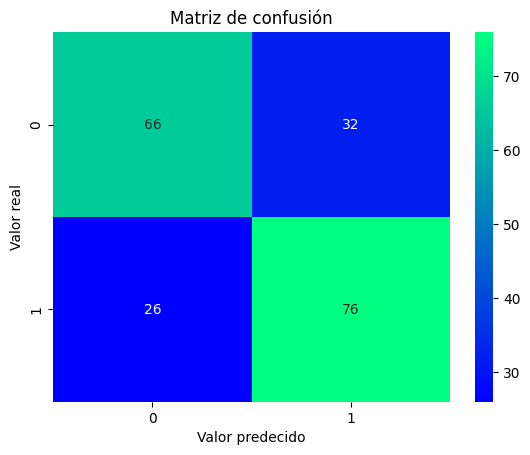

In [ ]:
sns.heatmap(cm, annot= True, fmt= '.0f', cmap= 'winter')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

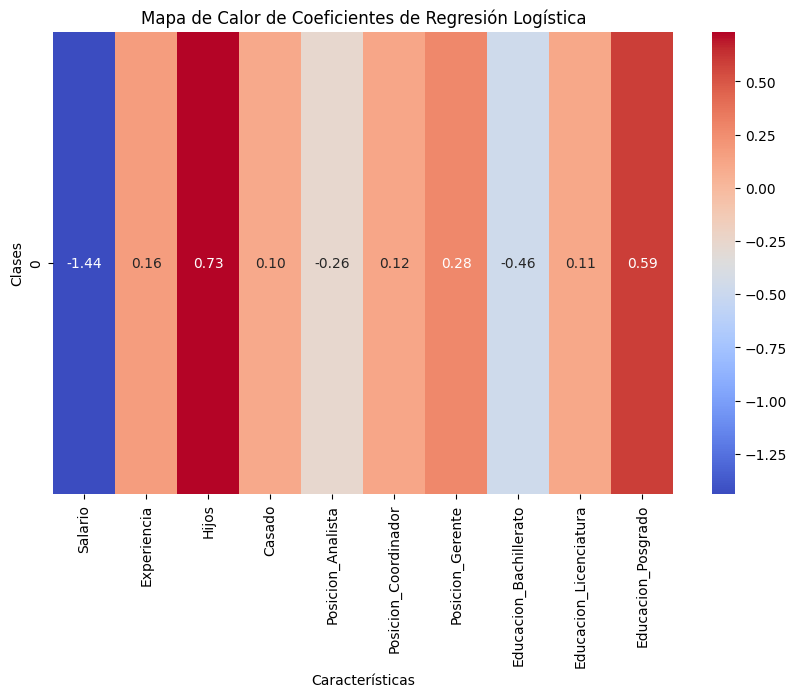

In [ ]:
coefficients = model.coef_
coef_df = pd.DataFrame(coefficients, columns=X.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(coef_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel("Características")
plt.ylabel("Clases")
plt.title("Mapa de Calor de Coeficientes de Regresión Logística")
plt.show()